## Questions

### 4. The race is part of the USATF ADK grand prix series. Has this race always been part of the series? 

BN: As far as I know the race has always been part of the series.  It's always been known as a fast, people look forward to it. 

###5.This race seems to draw big crowds and fast runners--how much do you think that the fact that this is a championship race and a grand prix race plays into that?

The fact that it is a championship race leads to fast times.  Especially up front.  The winning time is often below 20 minutes for male, and 23 for females. In fact, as we will show, big crowds and "sell-outs" actually led to slower times.  The championship designation has little to do with the big crowds.  

To start off with below is a plot of number of finishers vs. year....

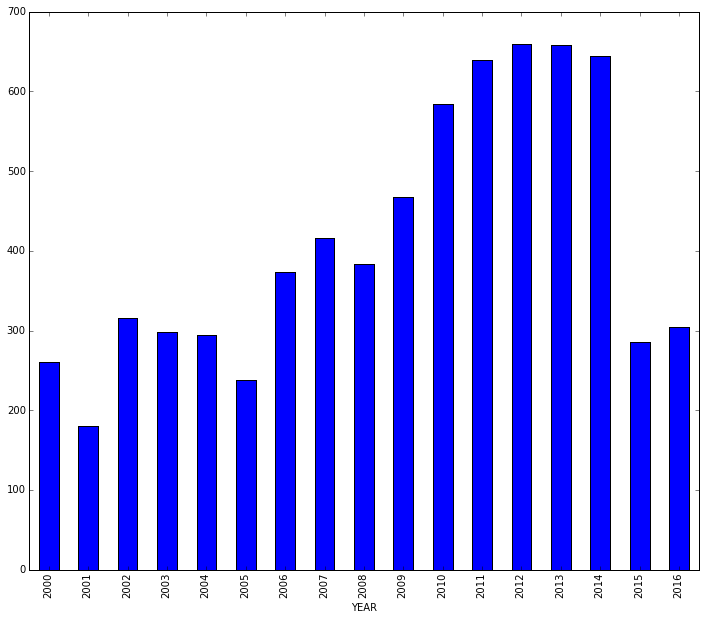

In [233]:
years['NUM'].plot(kind='bar',figsize=(12,10))

The race peaked at 650 finishers.  Let's take a quick look at finishing times (ignore the mumbo jumbo and jump to the plot)

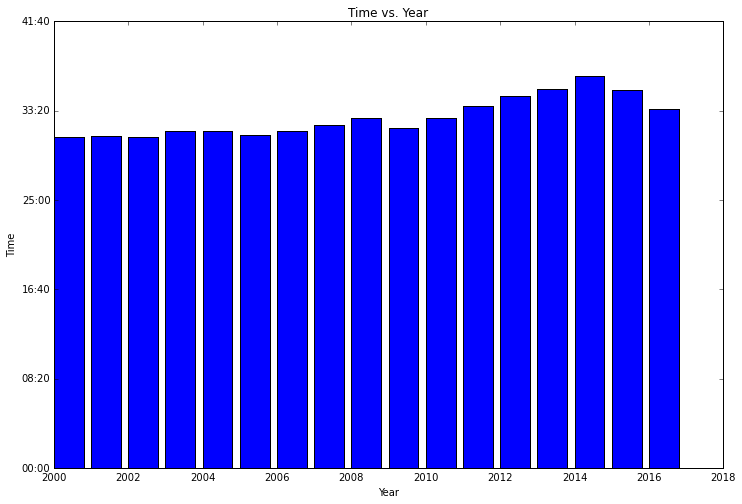

In [251]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(years.index,years.SECONDS)
ax.yaxis.set_major_formatter(FuncFormatter(s2ms))
ax.set_xlabel('Year')
ax.set_ylabel('Time')
ax.set_title('Time vs. Year')

In general finishing times got slower until 2014, the last couple of years they've improved.  We've had smaller numbers but slightly faster times.  Now the below plot is very interesting... it show number of finishers faster than 6 minute miles... and slower than 10 minute miles.  

The number of finishers below 10 minutes miles exploded... especially during the "sell-out" years of 2012-2014.  In the last year at Green-Island there were 220 finishers > 10 minute miles, but only 18 below 10 minutes.  When the race first started in 2000 there were more finishers < 6 than > 10.  

## 5. This race seems to draw big crowds and fast runners--how much do you think that the fact that this is a championship race and a grand prix race plays into that?

So you can see, big crowds, especially sell-out crowds and "fast runners" are not complimentary to each other.  The more competitive runners like to register later.  So when the race sold out early it got slower. 

My goal was to build the competitive aspects of the race again, the USATF grand prix, the HMRRC grand prix, and this year was a nice step in that direction.  I am hoping it stabalizes at a 400 or so person race, but a very competitive race.  

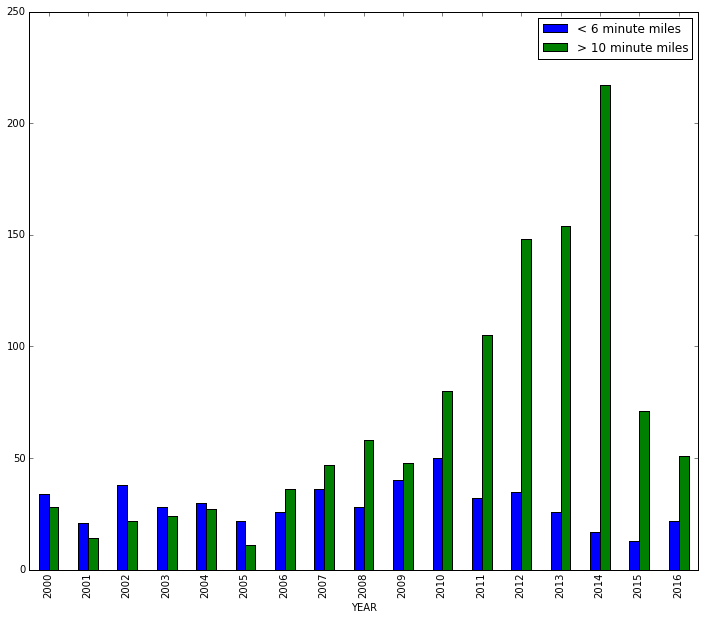

In [250]:
years[['< 6 minute miles','> 10 minute miles']].plot(kind='bar',figsize=(12,10))

##6. I liked the plots that you made of finishing times over the history of the race; did this years race stand out in any way in terms of race conditions, the competition, or anything else that struck you about it?

Below is a plot of males vs. females... early on there were many more men.  In the sell out years there were more women, especially 2014... not sure what that means.  Women are likely to be better planners??  And sign up early??  This year it was close to even, which is where it should be, I think

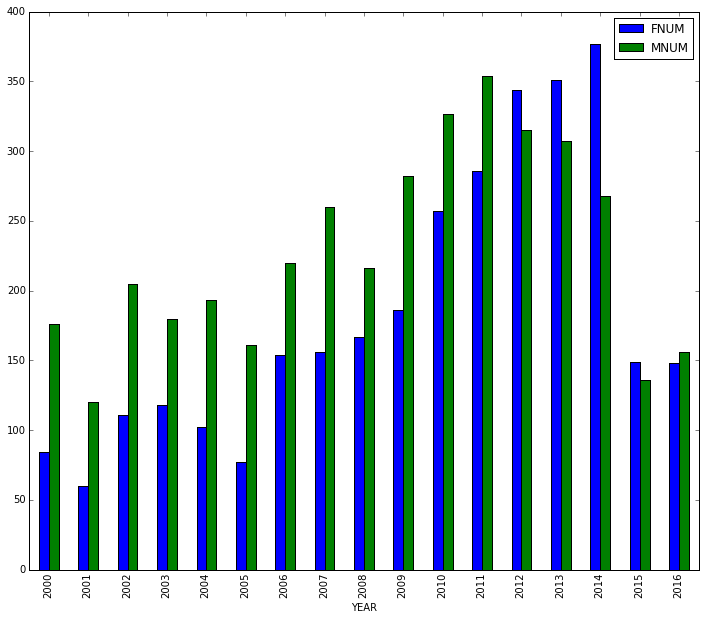

In [252]:
years[['FNUM','MNUM']].plot(kind='bar',figsize=(12,10))

Finally a plot of age vs. year.  There is a trend towards the field becoming older.  Especially the last two years.  
Older people may be running more.  I'm not sure what stats for other races say.  

I think the "sell-outs" are biased against older people.  They may be less likely to be connected 24/7 and jump on the latest race-craze sell out ship. 

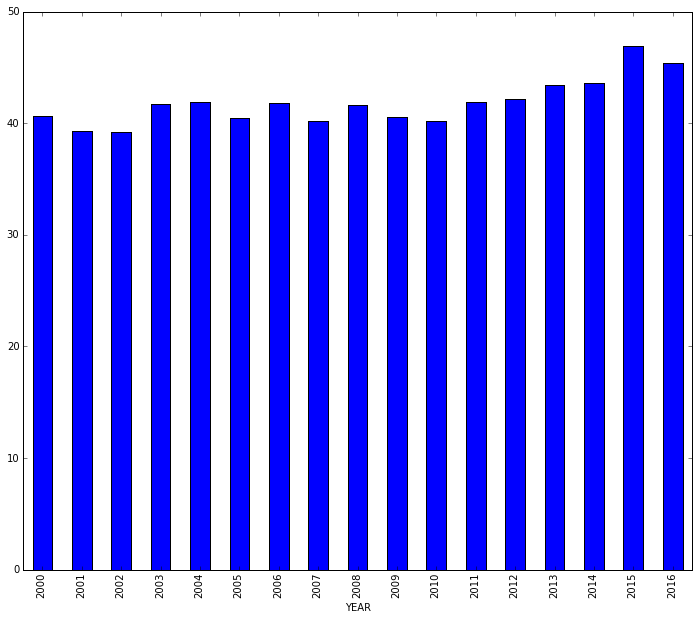

In [235]:
years['AGE'].plot(kind='bar',figsize=(12,10))

In [201]:
%matplotlib inline
import pandas as pd

In [202]:
alltime=pd.read_csv('../output/alltime.csv')
alltime.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME,YEAR
0,1,Chris,Hartshorn,31,M,Scenectady,NY,19:36,2003
1,1,Andy,Allstadt,26,M,Albany,NY,19:37,2009
2,2,Jamie,Rodriguez,21,M,Albany,NY,19:43,2003
3,1,Nick,Conway,30,M,Albany,NY,19:45,2006
4,2,Chuck,Terry,26,M,Albany,NY,19:45,2009


In [203]:
yearscount=alltime.groupby('YEAR').count()
yearscount.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME
YEAR,,,,,,,,
2000,260,260,260,260,260,260,260,260
2001,180,180,180,180,180,180,180,180
2002,316,316,316,315,316,316,316,316
2003,298,298,298,298,298,298,298,298
2004,295,295,295,295,295,295,295,295


In [205]:
# first strip minutes and seconds
import datetime
import numpy as np

def convert(s): 
    try:
        time=datetime.datetime.strptime(s,'%M:%S')
    except:
        time=datetime.datetime.strptime(s,'%M:%S.%f')
    return time

alltime.TIME = alltime.TIME.apply(lambda x: convert(x))
# create time delta by subtracting a base time
alltime.TIME=alltime.TIME - datetime.datetime.strptime('00:00.0','%M:%S.%f')
alltime['SECONDS'] = alltime.TIME.apply(lambda x: x / np.timedelta64(1, 's'))
alltime.head()

,PLACE,FIRSTNAME,LASTNAME,AGE,SEX,CITY,ST,TIME,YEAR,SECONDS
0,1,Chris,Hartshorn,31,M,Scenectady,NY,00:19:36,2003,1176
1,1,Andy,Allstadt,26,M,Albany,NY,00:19:37,2009,1177
2,2,Jamie,Rodriguez,21,M,Albany,NY,00:19:43,2003,1183
3,1,Nick,Conway,30,M,Albany,NY,00:19:45,2006,1185
4,2,Chuck,Terry,26,M,Albany,NY,00:19:45,2009,1185


In [247]:
females=[alltime[(alltime['YEAR']==year) & (alltime['SEX']=="F")]['PLACE'].count() for year in range(2000, 2017)]
males=[alltime[(alltime['YEAR']==year) & (alltime['SEX']=="M")]['PLACE'].count() for year in range(2000, 2017)]
b6=[alltime[(alltime['YEAR']==year) & (alltime['SECONDS']<6*60*4)]['PLACE'].count() for year in range(2000,2017)]
b8=[alltime[(alltime['YEAR']==year) & (alltime['SECONDS']<8*60*4)]['PLACE'].count() for year in range(2000,2017)]
p10=[alltime[(alltime['YEAR']==year) & (alltime['SECONDS']>10*60*4)]['PLACE'].count() for year in range(2000,2017)]

In [248]:
years=alltime.groupby('YEAR').mean()
years=years.drop('PLACE',1)
years['NUM']=yearscount.PLACE
years['FNUM']=females
years['MNUM']=males
years['< 6 minute miles']=b6
years['< 8 minute miles']=b8
years['> 10 minute miles']=p10
years.head()

,AGE,SECONDS,NUM,FNUM,MNUM,< 6 minute miles,< 8 minute miles,> 10 minute miles
YEAR,,,,,,,,
2000,40.611538,1852.265385,260,84,176,34,165,28
2001,39.333333,1857.261111,180,60,120,21,117,14
2002,39.206349,1854.136076,316,111,205,38,190,22
2003,41.684564,1886.885906,298,118,180,28,169,24
2004,41.908475,1888.108475,295,102,193,30,167,27


In [208]:
def s2ms(x, i):
    m = int(x/60)
    s = int(x%60)
    return '%(m)02d:%(s)02d' % {'m':m,'s':s}

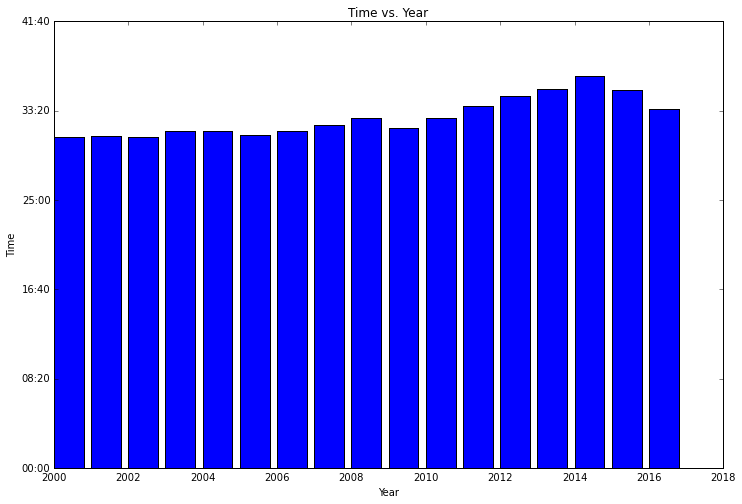

In [228]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(years.index,years.SECONDS)
ax.yaxis.set_major_formatter(FuncFormatter(s2ms))
ax.set_xlabel('Year')
ax.set_ylabel('Time')
ax.set_title('Time vs. Year')

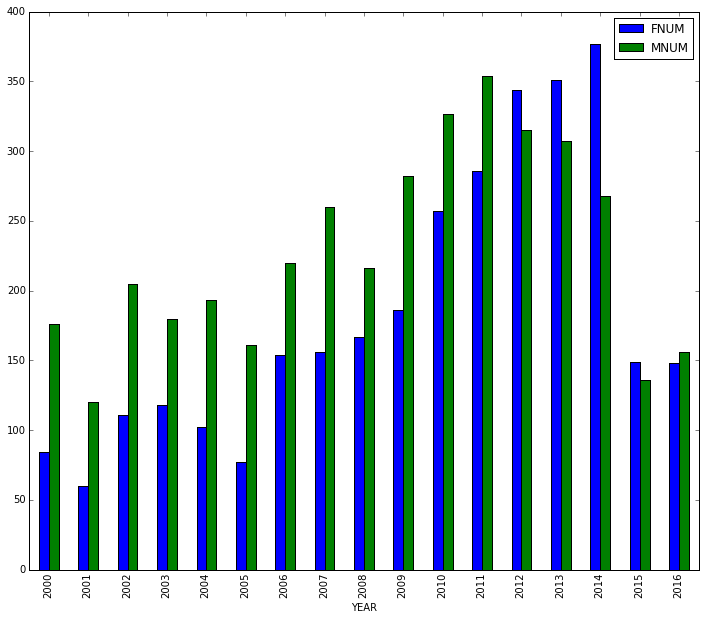

In [230]:
years[['FNUM','MNUM']].plot(kind='bar',figsize=(12,10))

In [231]:
years

,AGE,SECONDS,NUM,FNUM,MNUM
YEAR,,,,,
2000,40.611538,1852.265385,260,84,176
2001,39.333333,1857.261111,180,60,120
2002,39.206349,1854.136076,316,111,205
2003,41.684564,1886.885906,298,118,180
2004,41.908475,1888.108475,295,102,193
2005,40.453782,1861.159664,238,77,161
2006,41.850267,1887.553476,374,154,220
2007,40.200969,1921.605769,416,156,260
2008,41.676240,1958.548303,383,167,216
